In [1]:
using Revise

In [2]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using Flux
using ProgressMeter
using MLDataPattern
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC
using LearningMPC.Models
using Gurobi

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9db0e137604e898c25f194d972715156bd46cb81-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9db0e137604e898c25f194d972715156bd46cb81-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

INFO: Loading HttpServer methods...


In [28]:
solvetimes = [
    7.17,
    9.58,
    20.97,
    8.49,
    12.33,
    20.46,
    380.88,
    6.98,
    4.86,
    5.89,
    4.53,
    253.73,
    290.52,
    19.32,
    73.05,
    2491.72,
    579.22,
    1450.68,
    229.16,
    302.78,
    382.43,
    511.47,
    214.11,
    386.92,
    231.94,
    11.86,
    9.83,
    4.05,
    5367.36,
    1607.84,
    382.96,
    154.26,
    357.64,
    704.71,
    346.77,
    493.32,
    742.35,
    481.08,
    315.46,
    2242.64,
    324.73,
    465.41,
    0.24,
    4393.41,
    603.01,
    618.42,
    916.04,
    977.20,
    310.99,
    866.30,
    8.84,
    1520.29,
    858.05,
    2849.27,
]

54-element Array{Float64,1}:
    7.17
    9.58
   20.97
    8.49
   12.33
   20.46
  380.88
    6.98
    4.86
    5.89
    4.53
  253.73
  290.52
    ⋮   
    0.24
 4393.41
  603.01
  618.42
  916.04
  977.2 
  310.99
  866.3 
    8.84
 1520.29
  858.05
 2849.27

In [29]:
# One additional solve required 27,775 seconds and still did not converge,
# only reaching 1.29% of optimality. 

In [30]:
times = vcat(solvetimes, 27775)

55-element Array{Float64,1}:
     7.17
     9.58
    20.97
     8.49
    12.33
    20.46
   380.88
     6.98
     4.86
     5.89
     4.53
   253.73
   290.52
     ⋮   
  4393.41
   603.01
   618.42
   916.04
   977.2 
   310.99
   866.3 
     8.84
  1520.29
   858.05
  2849.27
 27775.0 

In [37]:
27775 / 60 / 60

7.715277777777778

In [34]:
minimum(times)

0.24

In [39]:
length(solvetimes)

54

In [35]:
maximum(solvetimes)

5367.36

In [36]:
mean(solvetimes)

663.5837037037037

In [38]:
mean(times)

1156.5185454545453

In [32]:
0.01 / mean(times)

8.64664041861059e-6

In [33]:
@printf "%0.f" 8e-6

0.000008

In [24]:
mean(solvetimes) / 60

11.059728395061729

In [23]:
(sum(solvetimes) + 27775) / 60 / 60

17.669033333333335

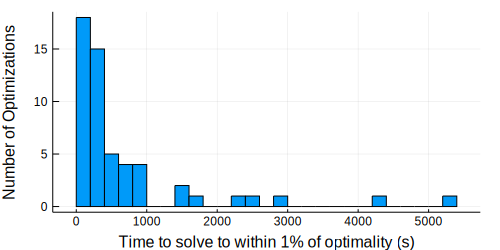

In [25]:
plt = histogram(solvetimes, xlabel="Time to solve to within 1% of optimality (s)",
    ylabel="Number of Optimizations",
    legend=false,
    size=(500, 250),
    nbins=30,
    )
savefig(plt, "full-optimality-histogram.pdf")
savefig(plt, "full-optimality-histogram.png")
plt

In [6]:
std(solvetimes)

3801.2632196637232